# Statistical Modeling

In [1]:
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

In [2]:
from scripts.data_processing import DataProcessing
from scripts.model import Modelling

In [3]:
import pandas as pd
insurance_df = pd.read_csv('data\\insurance_data.csv',low_memory=False)

In [4]:
# instanciate
processor=DataProcessing()
model=Modelling()

## Data Preparation

**Because of computational capacity we reduce the columns and rows to lower numbers**

In [85]:

insurance_df_minimized = insurance_df.drop(insurance_df.index[10000:])


### Replace Outliers

In [86]:
columns_to_drop = ['Country', 'NumberOfVehiclesInFleet', 'CrossBorder', 'Citizenship', 'UnderwrittenCoverID', 'Bank', 'IsVATRegistered','MainCrestaZone', 'SubCrestaZone', 'ItemType','mmcode']
insurance_df_minimized.drop(columns=columns_to_drop, inplace=True)
insurance_df_cleaned=processor.replace_outliers_with_mean(insurance_df_minimized)

### Replace Missing Values

In [87]:
insurance_df_cleaned=processor.replace_missing_with_mean_or_mode(insurance_df_cleaned)


In [88]:
total_nan = insurance_df_cleaned.isnull().sum().sum()
print(total_nan)

0


In [89]:
column_with_most_nan = insurance_df_cleaned.isnull().sum().idxmax()
nan_count = insurance_df_cleaned.isnull().sum().max()

print(f"Column with the most NaN values: {column_with_most_nan} ({nan_count} NaNs)")

Column with the most NaN values: PolicyID (0 NaNs)


### Identify Numerical and Catagorical columns

In [90]:
numerical_columns, categorical_columns, datetime_columns, boolean_columns=processor.categorize_columns(insurance_df_cleaned)

### Encode Catagorical columns

In [92]:
columns_label=[
    'TransactionMonth', 'VehicleIntroDate', 'CapitalOutstanding'
]
columns_onehot = [
    'LegalType', 'Title', 'Language', 'AccountType', 'MaritalStatus', 'Gender',
    'Province', 'VehicleType','make', 'Model', 'bodytype', 'AlarmImmobiliser', 'TrackingDevice',
    'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'TermFrequency',
    'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
    'Product', 'StatutoryClass', 'StatutoryRiskType'
]
df_label = processor.encoder('labelEncoder', insurance_df_cleaned, columns_label, columns_onehot)
df_encoded = processor.encoder('oneHotEncoder', df_label, [], columns_onehot)

### Scale Numerical columns

In [93]:
columns_scaler = ['PolicyID','PostalCode','Cylinders','cubiccapacity','kilowatts','NumberOfDoors','CustomValueEstimate','SumInsured','CalculatedPremiumPerTerm','TotalPremium','TotalClaims']
df_scaled = processor.scaler('minMaxScaler', df_encoded, columns_scaler)

### Split the data

In [94]:
# Split the data
X = df_scaled.drop(['TotalPremium','TotalClaims'], axis=1)
y = df_scaled['TotalPremium']
X_train, X_test, y_train, y_test = model.split_data(X, y)

### Train Model

In [95]:
# Train models
lr_model, dt_model, rfr_model, xgb_model = model.train_models(X_train, y_train)


### Evaluate Models

In [97]:
# Evaluate models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores, mse_scores, r2_scores = [], [], []
for Model in [lr_model, dt_model, rfr_model, xgb_model]:
    mae, mse, r2, _ = model.evaluate_model(Model, X_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)


In [98]:
r2_scores

[0.6634526881780274, 0.913837431713286, 0.9276053619779386, 0.9070997632651263]

In [99]:
mae_scores

[np.float64(0.03747684648121821),
 np.float64(0.0041089059770304335),
 np.float64(0.007550051651836401),
 np.float64(0.007827439600428084)]

In [100]:
mse_scores

[np.float64(0.005067215736612649),
 np.float64(0.001297304440097133),
 np.float64(0.0010900079606810742),
 np.float64(0.001398749967633105)]

### Plot Metrics

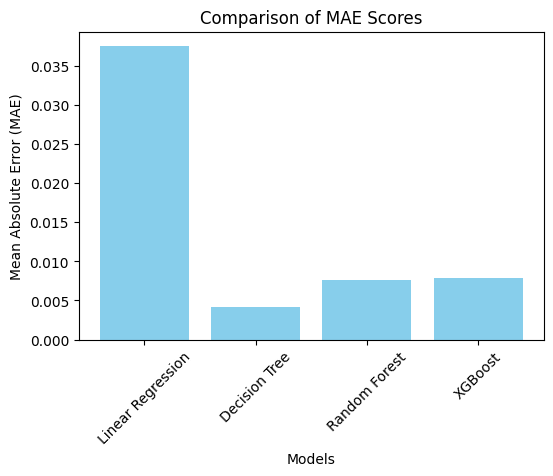

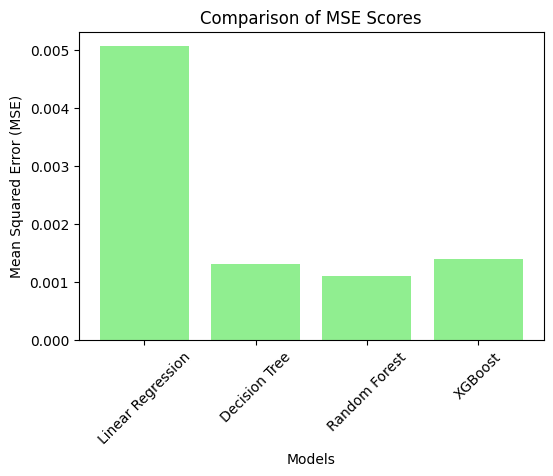

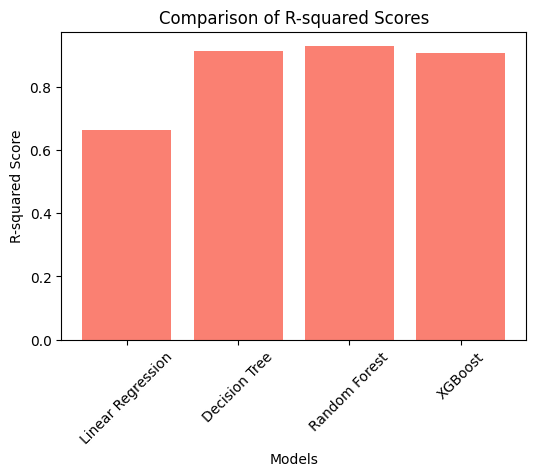

In [101]:
# Plot metrics
model.plot_metrics(models, mae_scores, mse_scores, r2_scores)